In [23]:
# To be implemented
# 1- Multiple Decision Makers
# 2- Fuzzy Classification (Pharma/Non)
# 3- 

In [24]:
import pandas as pd

df = pd.read_csv('diabetes2.csv')
df.head()
small_constant = 1e-6 

# Replace zero values with the small constant in the remaining columns
df[df.columns] = df[df.columns].replace(0, small_constant)
df.head()


,Pregnancies MAX,Glucose MAX,BloodPressure MAX,SkinThickness MIN,Insulin MIN,BMI MAX,Age MAX
0,Low,Low,Medium,Low,High,High,Low
1,High,High,High,Medium,Medium,High,High
2,Medium,Medium,High,High,Low,Low,Low
3,Low,Low,Low,High,High,Low,Low


In [25]:
replace_dict = {
    'Low': '1,3,5',
    'Medium': '3,5,7',
    'High': '5,7,9'
}

# Replace the values in the DataFrame
df.replace(replace_dict, inplace=True)

df.head()



,Pregnancies MAX,Glucose MAX,BloodPressure MAX,SkinThickness MIN,Insulin MIN,BMI MAX,Age MAX
0,"1,3,5","1,3,5","3,5,7","1,3,5","5,7,9","5,7,9","1,3,5"
1,"5,7,9","5,7,9","5,7,9","3,5,7","3,5,7","5,7,9","5,7,9"
2,"3,5,7","3,5,7","5,7,9","5,7,9","1,3,5","1,3,5","1,3,5"
3,"1,3,5","1,3,5","1,3,5","5,7,9","5,7,9","1,3,5","1,3,5"


In [26]:
# Define a function to find the inverse of a string of numbers separated by commas and round to 2 decimal places
def find_inverse(value):
    numbers = value.split(',')
    inverse_numbers = [format(1 / float(num), '.2f') for num in numbers]
    return ','.join(inverse_numbers)

# Apply the function to columns with "MIN" in their names
min_columns = [col for col in df.columns if 'MIN' in col]
df[min_columns] = df[min_columns].applymap(find_inverse)

# Print the modified DataFrame
print(df)
df.head()

  Pregnancies MAX Glucose MAX BloodPressure MAX SkinThickness MIN  \
0           1,3,5       1,3,5             3,5,7    1.00,0.33,0.20   
1           5,7,9       5,7,9             5,7,9    0.33,0.20,0.14   
2           3,5,7       3,5,7             5,7,9    0.20,0.14,0.11   
3           1,3,5       1,3,5             1,3,5    0.20,0.14,0.11   

      Insulin MIN BMI MAX Age MAX  
0  0.20,0.14,0.11   5,7,9   1,3,5  
1  0.33,0.20,0.14   5,7,9   5,7,9  
2  1.00,0.33,0.20   1,3,5   1,3,5  
3  0.20,0.14,0.11   1,3,5   1,3,5  


,Pregnancies MAX,Glucose MAX,BloodPressure MAX,SkinThickness MIN,Insulin MIN,BMI MAX,Age MAX
0,"1,3,5","1,3,5","3,5,7","1.00,0.33,0.20","0.20,0.14,0.11","5,7,9","1,3,5"
1,"5,7,9","5,7,9","5,7,9","0.33,0.20,0.14","0.33,0.20,0.14","5,7,9","5,7,9"
2,"3,5,7","3,5,7","5,7,9","0.20,0.14,0.11","1.00,0.33,0.20","1,3,5","1,3,5"
3,"1,3,5","1,3,5","1,3,5","0.20,0.14,0.11","0.20,0.14,0.11","1,3,5","1,3,5"


In [27]:
# Define functions for normalization
def normalize_max(column):
    values = column.split(',')
    max_value = max(map(int, values))
    return [round(int(val) / max_value, 3) for val in values]

def normalize_min(column):
    values = column.split(',')
    min_value = min(map(float, values))
    normalized_values = [round(min_value / float(val), 3) for val in values]
    return normalized_values

# Apply normalization based on column names
for column_name in df.columns:
    if 'MAX' in column_name:
        df[column_name] = df[column_name].apply(normalize_max)
    elif 'MIN' in column_name:
        df[column_name] = df[column_name].apply(normalize_min)

print(df)

       Pregnancies MAX          Glucose MAX    BloodPressure MAX  \
0      [0.2, 0.6, 1.0]      [0.2, 0.6, 1.0]  [0.429, 0.714, 1.0]   
1  [0.556, 0.778, 1.0]  [0.556, 0.778, 1.0]  [0.556, 0.778, 1.0]   
2  [0.429, 0.714, 1.0]  [0.429, 0.714, 1.0]  [0.556, 0.778, 1.0]   
3      [0.2, 0.6, 1.0]      [0.2, 0.6, 1.0]      [0.2, 0.6, 1.0]   

    SkinThickness MIN         Insulin MIN              BMI MAX  \
0   [0.2, 0.606, 1.0]  [0.55, 0.786, 1.0]  [0.556, 0.778, 1.0]   
1   [0.424, 0.7, 1.0]   [0.424, 0.7, 1.0]  [0.556, 0.778, 1.0]   
2  [0.55, 0.786, 1.0]   [0.2, 0.606, 1.0]      [0.2, 0.6, 1.0]   
3  [0.55, 0.786, 1.0]  [0.55, 0.786, 1.0]      [0.2, 0.6, 1.0]   

               Age MAX  
0      [0.2, 0.6, 1.0]  
1  [0.556, 0.778, 1.0]  
2      [0.2, 0.6, 1.0]  
3      [0.2, 0.6, 1.0]  


In [28]:
import skcriteria as skc 


In [29]:
# Remove the outer square brackets from all elements
df = df.applymap(lambda x: x[0])
matrix  = df.values.tolist()
matrix


[[0.2, 0.2, 0.429, 0.2, 0.55, 0.556, 0.2],
 [0.556, 0.556, 0.556, 0.424, 0.424, 0.556, 0.556],
 [0.429, 0.429, 0.556, 0.55, 0.2, 0.2, 0.2],
 [0.2, 0.2, 0.2, 0.55, 0.55, 0.2, 0.2]]

In [30]:
# Let's say we want to rank on which patient is more vulnerable to diabetes
# We set maximization for - pregnancy, glucose, bp, bmi and age
# We set minimization for skin thickness, insulin

objectives = [max, max, max, min, min, max, max]


# Assign weights to the conditions ( add up to 1 )

weights=[0.1, 0.2, 0.2, 0.15, 0.15, 0.1, 0.1]

In [31]:
# Create the Decision Matrix

dm = skc.mkdm(
    matrix,
    objectives,
    weights,
    criteria= ["Pregnancy MAX",
               "Glucose MAX",
               "BloodPressure MAX",
               "SkinThickness MIN",
               "Insulin MIN",
               "BMI MAX",
               "Age MAX"]
)
dm

,Pregnancy MAX[▲ 0.10],Glucose MAX[▲ 0.20],BloodPressure MAX[▲ 0.20],SkinThickness MIN[▼ 0.15],Insulin MIN[▼ 0.15],BMI MAX[▲ 0.10],Age MAX[▲ 0.10]
A0,0.200,0.200,0.429,0.200,0.550,0.556,0.200
A1,0.556,0.556,0.556,0.424,0.424,0.556,0.556
A2,0.429,0.429,0.556,0.550,0.200,0.200,0.200
A3,0.200,0.200,0.200,0.550,0.550,0.200,0.200


In [32]:
dm.matrix  # this data ignores the objectives and the weights

Criteria,Pregnancy MAX,Glucose MAX,BloodPressure MAX,SkinThickness MIN,Insulin MIN,BMI MAX,Age MAX
Alternatives,,,,,,,
A0,0.200,0.200,0.429,0.200,0.550,0.556,0.200
A1,0.556,0.556,0.556,0.424,0.424,0.556,0.556
A2,0.429,0.429,0.556,0.550,0.200,0.200,0.200
A3,0.200,0.200,0.200,0.550,0.550,0.200,0.200


In [33]:
#dm.plot.wheatmap()

In [34]:
type(dm)

skcriteria.core.data.DecisionMatrix

In [35]:
# Sum Scaler - Normalize scale (0-1)
from skcriteria.preprocessing import invert_objectives, scalers

scaler = scalers.SumScaler(target="weights") #normalize WEIGHTS only. Values normalized earlier.
dmt = scaler.transform(dm)
dmt

,Pregnancy MAX[▲ 0.10],Glucose MAX[▲ 0.20],BloodPressure MAX[▲ 0.20],SkinThickness MIN[▼ 0.15],Insulin MIN[▼ 0.15],BMI MAX[▲ 0.10],Age MAX[▲ 0.10]
A0,0.200,0.200,0.429,0.200,0.550,0.556,0.200
A1,0.556,0.556,0.556,0.424,0.424,0.556,0.556
A2,0.429,0.429,0.556,0.550,0.200,0.200,0.200
A3,0.200,0.200,0.200,0.550,0.550,0.200,0.200


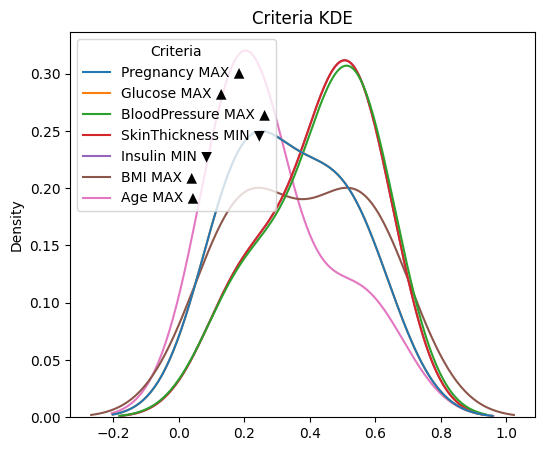

In [36]:

import matplotlib.pyplot as plt

# Create a figure for the criteria KDE plot
fig1, axs1 = plt.subplots(figsize=(6, 5))

# Plot the criteria KDE
dm.plot.kde(ax=axs1)
axs1.set_title("Criteria KDE")

# Show the figure
plt.show()



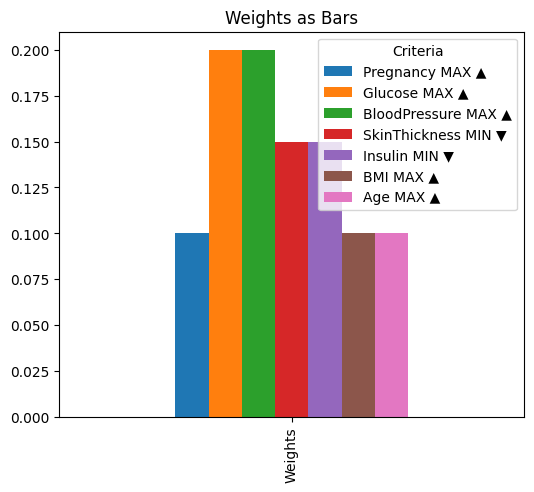

In [37]:
import matplotlib.pyplot as plt

# Create a figure for the weights as bars plot
fig2, axs2 = plt.subplots(figsize=(6, 5))

# Plot the weights as bars
dmt.plot.wbar(ax=axs2)
axs2.set_title("Weights as Bars")

# Show the figure
plt.show()


In [38]:
# TOPSIS
from skcriteria.madm import similarity  
from skcriteria.pipeline import mkpipe  


In [39]:
pipe = mkpipe(
    invert_objectives.NegateMinimize(),
    scalers.VectorScaler(target="matrix"),  # this scaler transform the matrix
    scalers.SumScaler(target="weights"),  # and this transform the weights
    similarity.TOPSIS(),
)

pipe

<SKCPipeline [steps=[('negateminimize', <NegateMinimize []>), ('vectorscaler', <VectorScaler [target='matrix']>), ('sumscaler', <SumScaler [target='weights']>), ('topsis', <TOPSIS [metric='euclidean']>)]]>

In [40]:
rankTOPSIS = pipe.evaluate(dm)
rankTOPSIS

Alternatives,A0,A1,A2,A3
Rank,3,1,2,4


In [41]:
import pandas as pd

rank_list = rankTOPSIS.rank_
rank_alternatives = rankTOPSIS.alternatives

rank_df_topsis = pd.DataFrame({
    'Rank': rank_list,
    'Candidate': rank_alternatives
})

# Sort the DataFrame by rank in ascending order
rank_df_topsis = rank_df_topsis.sort_values(by='Rank', ascending=True)
rank_df_topsis = rank_df_topsis.reset_index(drop=True)

print(rank_df_topsis)


   Rank Candidate
0     1        A1
1     2        A2
2     3        A0
3     4        A3


In [42]:
#TOPSIS Metrics

print(rankTOPSIS.e_)
print("Ideal:", rankTOPSIS.e_.ideal)
print("Anti-Ideal:", rankTOPSIS.e_.anti_ideal)
print("Similarity index:", rankTOPSIS.e_.similarity)

<extra {'similarity', 'anti_ideal', 'ideal'}>
Ideal: [ 0.07343962  0.14687924  0.12116245 -0.0330334  -0.0330334   0.06653689
  0.08487452]
Anti-Ideal: [ 0.02641713  0.05283426  0.04358361 -0.09084184 -0.09084184  0.02393413
  0.0305304 ]
Similarity index: [0.39382825 0.74227496 0.54751958 0.        ]


In [43]:
#from skcriteria.preprocessing import invert_objectives, scalers

# Invert minimize - 1/ criterion

#inverter = invert_objectives.InvertMinimize()
#dmt = inverter.transform(dm)

In [44]:
# Weighted Sum Model
from skcriteria.madm import simple

dec = simple.WeightedSumModel()
rankWS = dec.evaluate(dm)  # we use the tansformed version of the data
rankWS

import pandas as pd

rank_list = rankWS.rank_
rank_alternatives = rankWS.alternatives

rank_df_ws = pd.DataFrame({
    'Rank': rank_list,
    'Candidate': rank_alternatives
})

# Sort the DataFrame by rank in ascending order
rank_df_ws = rank_df_ws.sort_values(by='Rank', ascending=True)
rank_df_ws = rank_df_ws.reset_index(drop=True)

print(rank_df_ws)

ValueError: WeightedSumModel can't operate with minimize objective